## Initial Visualization
After running the measurements in the initial project, here is the results we get:

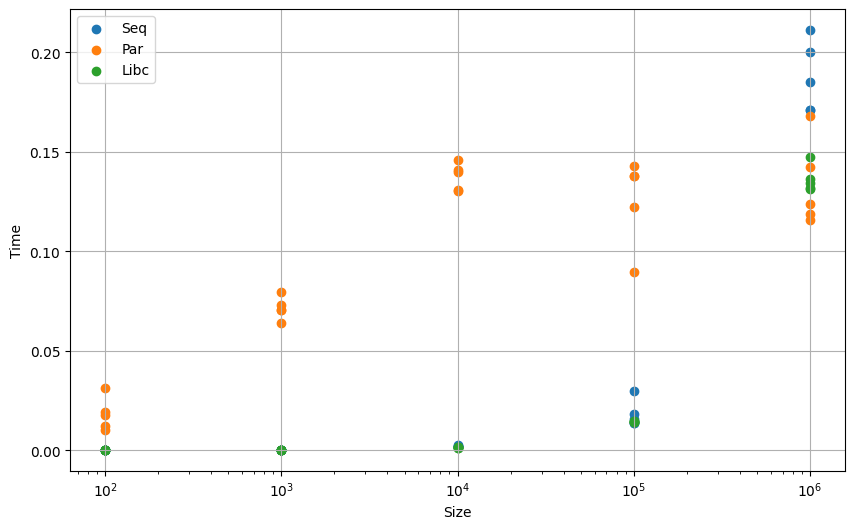

In [76]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('data/results.csv')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Plot with Size on x-axis
plt.figure(figsize=(10, 6))
for col in ['Seq', 'Par', 'Libc']:
    plt.scatter(df['Size'], df[col], marker='o', label=col)

plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

# Now lets see what happens if we add in 10^7.

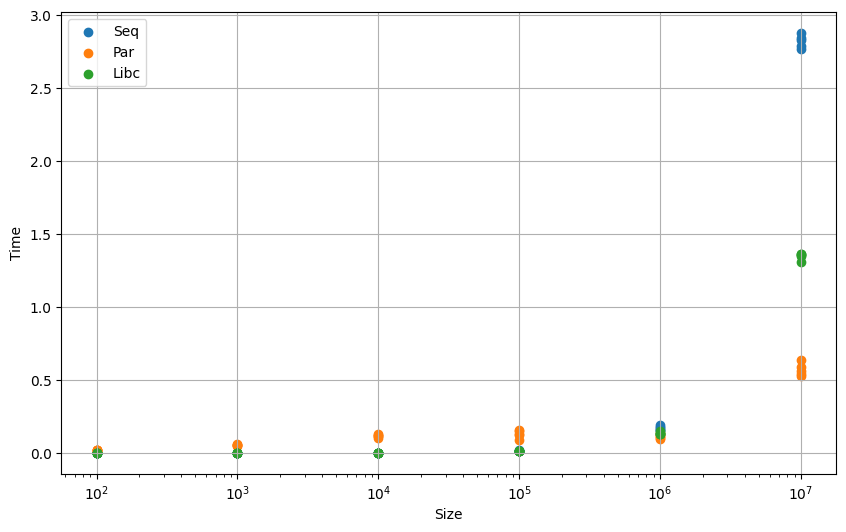

In [77]:
df = pd.read_csv('data/results2.csv')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Plot with Size on x-axis
plt.figure(figsize=(10, 6))
for col in ['Seq', 'Par', 'Libc']:
    plt.scatter(df['Size'], df[col], marker='o', label=col)

plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

## First impression
The parallel quicksort start off with a much higher execution time than the other versions, but as input size increases it starts to perform better.
The crossover point is around 10^6.
The data at 10^7 is crucial to see the trend, and it shows that the parallel quicksort is much faster than the other versions at that size.
We only have 5 data points for each data size and measurment, but visualizing them they tent to stick together, which is a good sign that our measurements are consistent.

But here's what might be wrong with the measurement we took so far:
- Not randomized order (caching issues, other software running in the background, etc.)
- No confidence intervals, which means we can't be sure if the differences we see are statistically significant or just due to random variation.

Here's how the experiment could be generalized, to prove our hypothesis that the parallel quicksort is faster than the sequential one for large input sizes:
- Use other machines with different hardware specifications to see if the results hold across different environments.
- Use different input sizes, especially larger ones, to see if the trend continues.
- Use different types of input data (e.g., sorted, reverse sorted, random) to see if the performance varies based on the input characteristics.
- Use consistent outside factors (e.g., close other applications, run the experiment at the same time of day) to minimize the impact of external variables on the results.
- Use a larger number of measurements to increase the reliability of the results and allow for the calculation of confidence intervals.


So let's change the repetition of the experiment to 30, and randomize the order of the measurements, and see if we get a different result.

Old benchmarking code:
```
for i in 100 1000 10000 100000 1000000 10000000; do
    for rep in `seq 1 5`; do
        echo "Size: $i" >> $OUTPUT_FILE;
        ./src/parallelQuicksort $i >> $OUTPUT_FILE;
    done ;
done
```
New benchmarking code:
```
sizes=(100 1000 10000 100000 1000000 10000000 30000000)
shuffled=($(printf '%s\n' "${sizes[@]}" | shuf))

for i in "${shuffled[@]}"; do
    for rep in `seq 1 30`; do
        echo "Size: $i" >> $OUTPUT_FILE;
        ./src/parallelQuicksort $i >> $OUTPUT_FILE;
    done ;
done

```

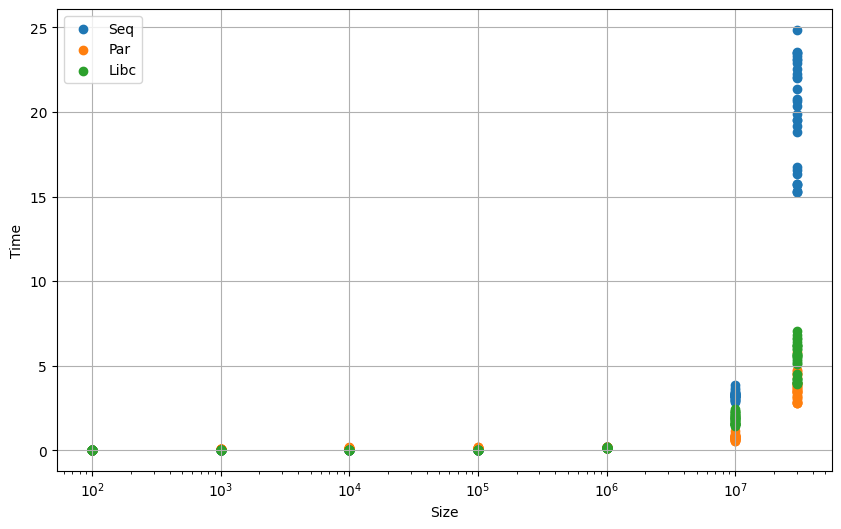

In [78]:
df = pd.read_csv('data/results3.csv')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Plot with Size on x-axis
plt.figure(figsize=(10, 6))
for col in ['Seq', 'Par', 'Libc']:
    plt.scatter(df['Size'], df[col], marker='o', label=col)

plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

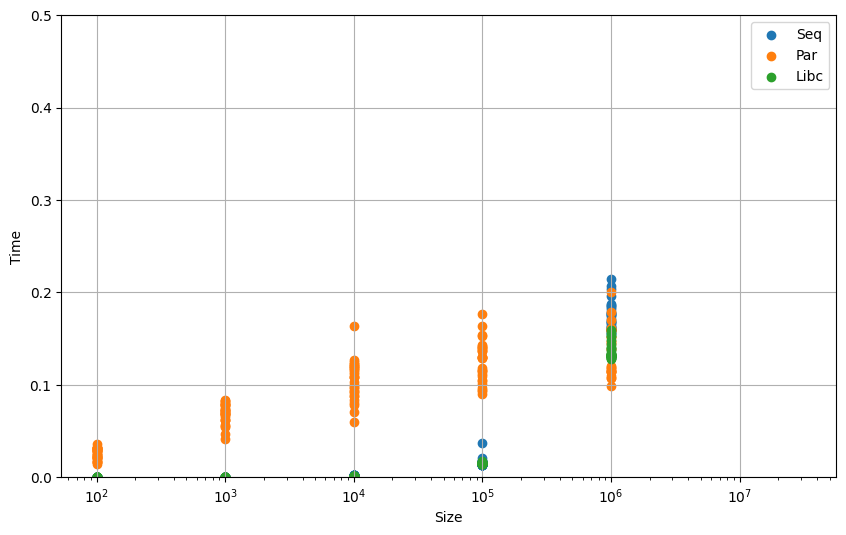

In [79]:
#lets zoom in on the small values
df = pd.read_csv('data/results3.csv')
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Plot with Size on x-axis
plt.figure(figsize=(10, 6))
for col in ['Seq', 'Par', 'Libc']:
    plt.scatter(df['Size'], df[col], marker='o', label=col)

plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.ylim(0, 0.5)
plt.show()

let's calculate the confidence intervals for the different sizes and methods
we want to calculate the 95% confidence interval for the mean time for each size and method -> thus the t-value for 95% confidence and n-1 degrees of freedom
Let's plot it with error bars to visualize the confidence intervals.

95% confidence interval for Seq at size 10^7: (np.float64(3.1482679518614907), np.float64(3.340449514805176))


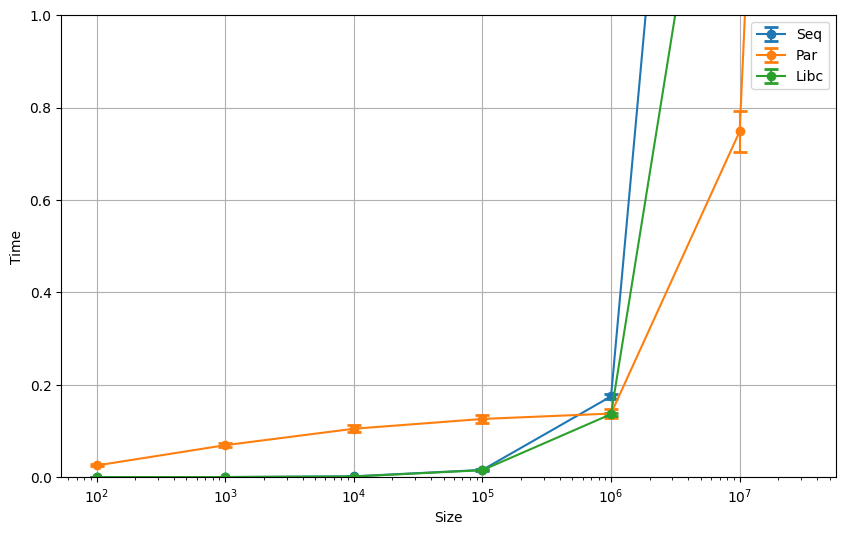

In [80]:
df = pd.read_csv('data/results3.csv')
# for example for the size 10^7 the confidence interval is going to be:
data = df.loc[df['Size'] == 10**7, 'Seq']
mean = data.mean()
std = data.std()
n = len(data)
t_value = 2.447  # t-value for 95% confidence and n-1 degrees of freedom
margin_of_error = t_value * (std / (n ** 0.5))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)
print(f"95% confidence interval for Seq at size 10^7: {confidence_interval}")
#Luckily we do not have to calculate for each as matplotlib has a built in function for this
# let's plot the confidence intervals for each size and method
plt.figure(figsize=(10, 6))
grouped = df.groupby('Size')
for col in ['Seq', 'Par', 'Libc']:
    means = grouped[col].mean()
    stds = grouped[col].std()
    counts = grouped[col].count()
    # Calculate 95% confidence interval using t-distribution
    # For n=30, t-value is 2.045 (for 95% confidence, 29 degrees of freedom)
    t_value = 2.045
    margin_of_error = t_value * (stds / (counts ** 0.5))
    plt.errorbar(means.index, means, yerr=margin_of_error, fmt='o-', capsize=5, capthick=2, label=col)
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.ylim(0, 1)
plt.show()



# Computing indepentent Confidence Intervals
To further analyze the different algotihms, we have to analyze the results from other machines and operating systems, to see if the results hold across different environments.
Let's see the results on another machine, with a different operating system and hardware specifications, to see if the results are consistent across different environments. Let's also compute the confidence intervals for the different sizes and methods, to see if the differences we see are statistically significant or just due to random variation.

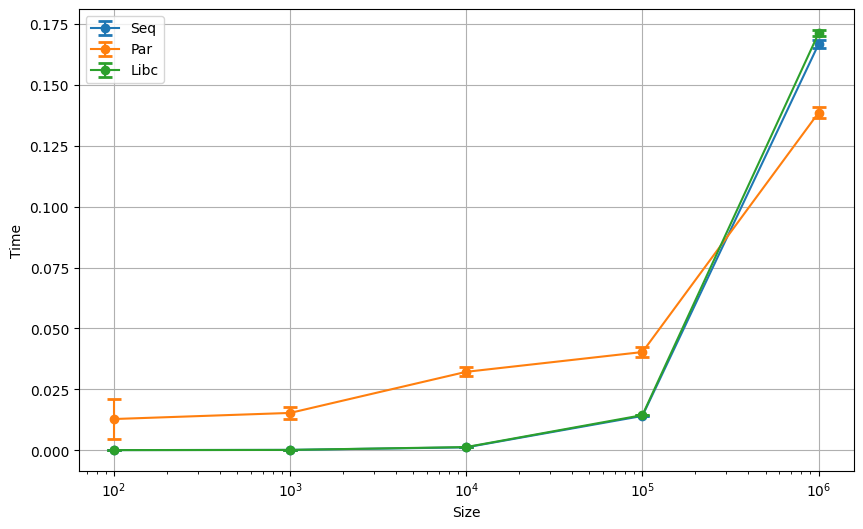

In [103]:
df = pd.read_csv('data/results4.csv')

plt.figure(figsize=(10, 6))
grouped = df.groupby('Size')
for col in ['Seq', 'Par', 'Libc']:
    means = grouped[col].mean()
    stds = grouped[col].std()
    counts = grouped[col].count()
    # Calculate 95% confidence interval using t-distribution
    # For n=30, t-value is 2.045 (for 95% confidence, 29 degrees of freedom)
    t_value = 2.045
    margin_of_error = t_value * (stds / (counts ** 0.5))
    plt.errorbar(means.index, means, yerr=margin_of_error, fmt='o-', capsize=5, capthick=2, label=col)
plt.xlabel('Size')
plt.ylabel('Time')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()



We can immediately see that on this machine the Libc and the Seq versions are more similar.
We can also see that the crossoever seems to happen before 10^6, which is different from the previous machine. We can also confirm that the differences are statistically significant, as the confidence intervals do not overlap for the different methods at larger input sizes.
But the overall trend is the same, which is that the parallel quicksort starts off slower but becomes faster as the input size increases.
Unfortunately I could not process the data from the others in the group but here's an image which shows the results from their machine. 
```markdown
![Results from different machines](different_machines.jpeg)
```
I am not gonna analyze those results, but it is vital to see that different machines produce vastly different results, which is why it is important to test on multiple machines to see if the results hold across different environments.

### Conclusions:
- The parallel quicksort is faster than the sequential one for large input sizes, but it starts off slower for small input sizes. (probably due to the overhead of parallelization).
- The crossover point where the parallel quicksort starts to outperform the sequential one is around 10^6, but this can vary based on the machine and other factors.
- Size is the main factor that affects the performance of the algorithms, but other factors such as hardware specifications and input characteristics can also play a role.
- There is a significant amount of variability in the measurements, which is why it is important to take multiple measurements and compute confidence intervals to see if the differences we see are statistically significant or just due to random variation. Computing it confirms that the differences we see are statistically significant, as the confidence intervals do not overlap for the different methods at larger input sizes.
- Built in and sequential quicksorts have similar performance, so we can conclude that the built in quicksort is not optimized for parallelism and is likely implemented in a similar way to the sequential version, which is why they have similar performance. (We havent analyzed this in depth, but it is a reasonable conclusion based on the data we have).
- We have only analyzed 2 computesrs and the results had a significant variance in the two environments, which is why if we were to further analyze this we would need to test on more machines to see if the results hold across different environments.
- If we wanted to fit a function to this data we would definitely need to take into account the fact that the performance of the algorithms is not just a function of the input size, but also of other factors such as hardware specifications and input characteristics, which is why a simple linear or polynomial model might not be sufficient to capture the complexity of the data.